In [1]:
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

filename = 'bank-additional-full.csv'
data = pd.read_csv(filename, sep=';')

In [2]:
print(data.shape, data.columns)

(41188, 21) Index(['age', 'job', 'marital', 'education', 'default', 'housing', 'loan',
       'contact', 'month', 'day_of_week', 'duration', 'campaign', 'pdays',
       'previous', 'poutcome', 'emp.var.rate', 'cons.price.idx',
       'cons.conf.idx', 'euribor3m', 'nr.employed', 'y'],
      dtype='object')


In [3]:
print(data.describe())

               age      duration      campaign         pdays      previous  \
count  41188.00000  41188.000000  41188.000000  41188.000000  41188.000000   
mean      40.02406    258.285010      2.567593    962.475454      0.172963   
std       10.42125    259.279249      2.770014    186.910907      0.494901   
min       17.00000      0.000000      1.000000      0.000000      0.000000   
25%       32.00000    102.000000      1.000000    999.000000      0.000000   
50%       38.00000    180.000000      2.000000    999.000000      0.000000   
75%       47.00000    319.000000      3.000000    999.000000      0.000000   
max       98.00000   4918.000000     56.000000    999.000000      7.000000   

       emp.var.rate  cons.price.idx  cons.conf.idx     euribor3m   nr.employed  
count  41188.000000    41188.000000   41188.000000  41188.000000  41188.000000  
mean       0.081886       93.575664     -40.502600      3.621291   5167.035911  
std        1.570960        0.578840       4.628198    

In [4]:
data['count'] = 1
y_count = data['y'].value_counts()
data['percentage'] = data.apply(lambda x: 1 / y_count[x['y']], axis=1)
pass

## Age

<Figure size 720x360 with 0 Axes>

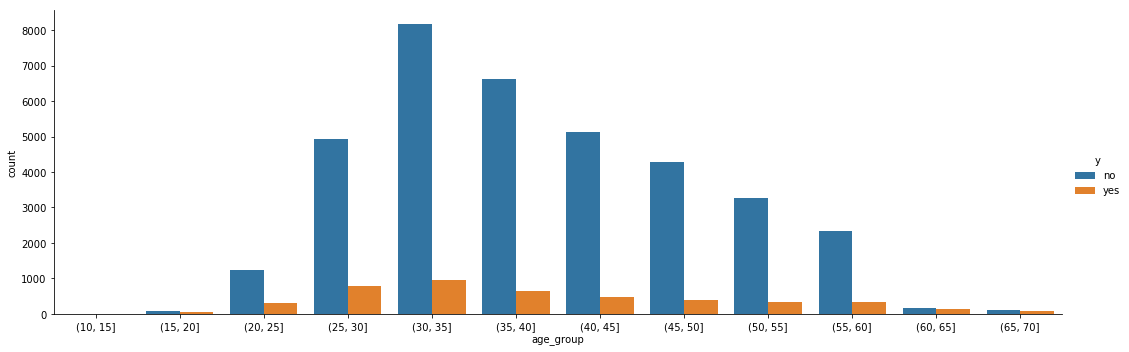

In [5]:
plt.figure(figsize=(10,5))
tmpdata = data
tmpdata['age_group'] = pd.cut(data['age'], bins=range(10, 71, 5))
sns.catplot(x="age_group", y="count", hue="y", kind = 'bar', aspect=3,
             data=tmpdata.groupby(by=['age_group', 'y'], as_index=False).agg({'count': pd.Series.sum}))
plt.savefig('./assets/age_sum.svg', format='svg')

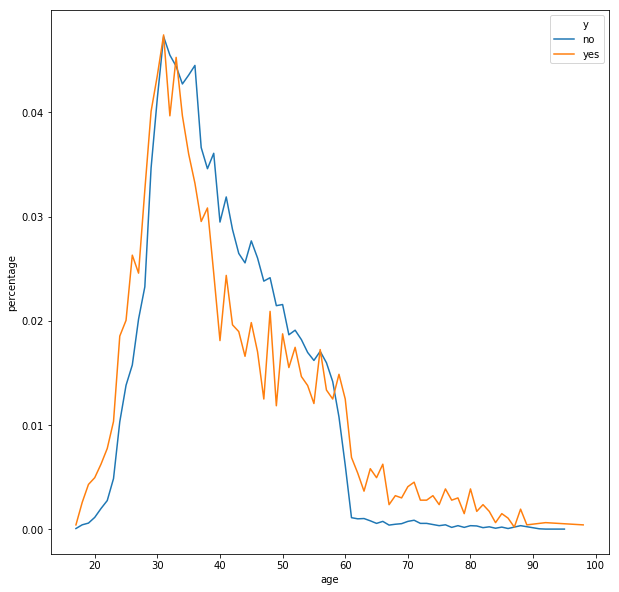

In [6]:
plt.figure(figsize=(10,10))
sns.lineplot(x="age", y="percentage", hue="y",
             data=data.groupby(by=['age', 'y'], as_index=False).agg({'percentage': pd.Series.sum}))
plt.savefig('./assets/age.svg', format='svg')

## Job

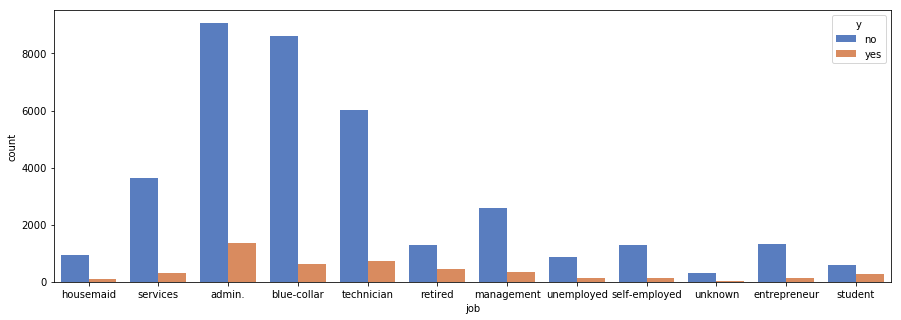

In [7]:
plt.figure(figsize=(15, 5))
sns.countplot(x="job", hue="y", data=data, palette="muted")
plt.savefig('./assets/job.svg', format='svg')

<Figure size 2160x1440 with 0 Axes>

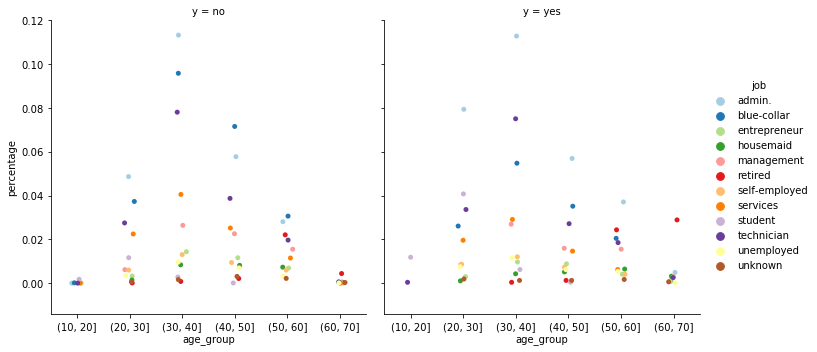

In [8]:
plt.figure(figsize=(30,20))
tmpdata = data
tmpdata['age_group'] = pd.cut(data['age'], bins=range(10, 71, 10))
# tmpdata.drop(['age'], axis=1)
tmpdata = tmpdata.groupby(by=['job', 'age_group', 'y'], as_index=False).agg({'percentage': pd.Series.sum})
sns.catplot(x="age_group", y="percentage", hue="job", col="y",
                palette="Paired", 
                kind="strip", data=tmpdata)
plt.savefig('./assets/job_age.svg', format='svg')

## Marital

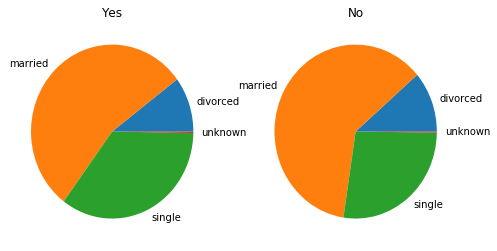

In [9]:
marital = data[data['y']=='yes'].groupby('marital').count()['y'].index
marital_count_yes = data[data['y']=='yes'].groupby('marital').count()['y']
marital_count_no = data[data['y']=='no'].groupby('marital').count()['y']
#print(marital.values)
#print(marital_count_yes.values)
#print(marital_count_no)
plt.figure(figsize=(8, 4)) 
plt.subplot(121)
plt.title('Yes')
plt.pie(marital_count_yes.values,labels = marital)
plt.subplot(122)
plt.title('No')
plt.pie(marital_count_no.values,labels = marital)
# plt.show()
plt.savefig('./assets/marital.svg', format='svg')

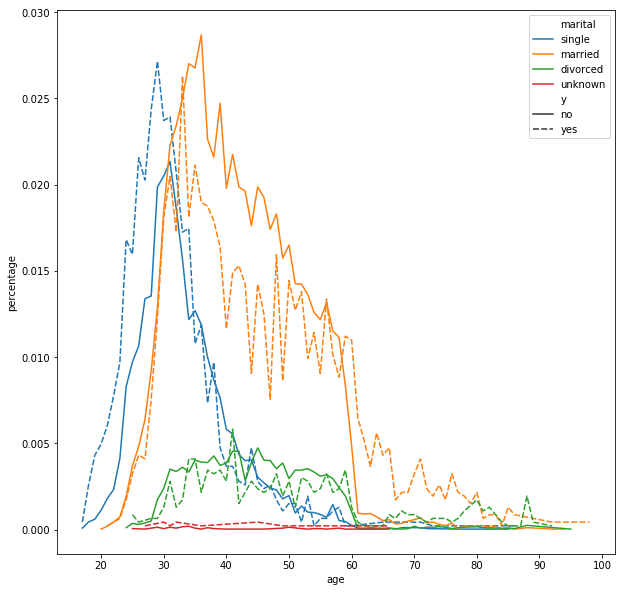

In [10]:
plt.figure(figsize=(10,10))
sns.lineplot(x="age", y="percentage", hue="marital", style="y",
             data=data.groupby(by=['age', 'marital', 'y'], as_index=False).agg({'percentage': pd.Series.sum}))
plt.savefig('./assets/marital_age.svg', format='svg')

## Education

<Figure size 1080x360 with 0 Axes>

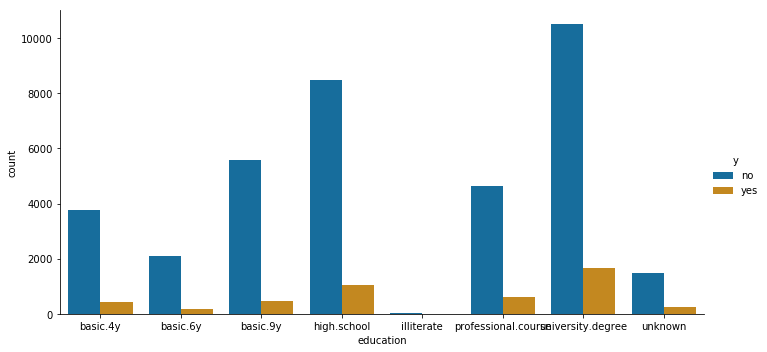

In [11]:
plt.figure(figsize=(15, 5))
sns.catplot(x="education", y="count", hue="y", kind="bar", palette="colorblind", aspect=2,
            data=data.groupby(by=['education', 'y'], as_index=False).agg({'count': pd.Series.count}))
plt.savefig('./assets/education.svg', format='svg')

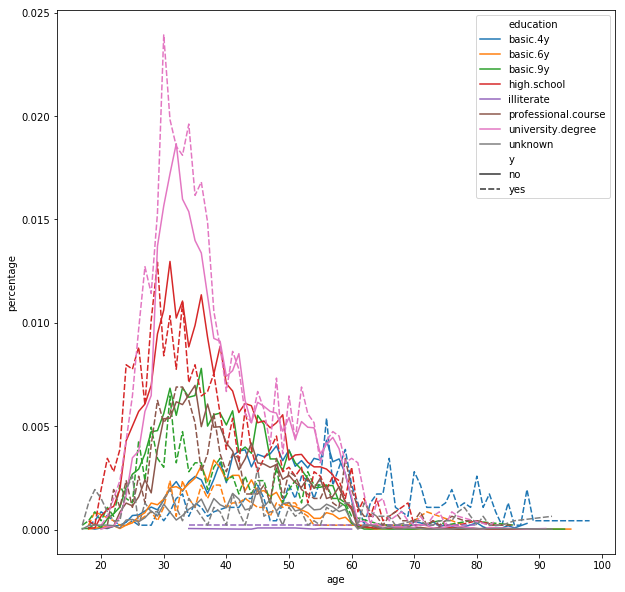

In [12]:
plt.figure(figsize=(10,10))
sns.lineplot(x="age", y="percentage", hue="education", style="y",
             data=data.groupby(by=['education', 'age', 'y'], as_index=False).agg({'percentage': pd.Series.sum}))
plt.savefig('./assets/education_age.svg', format='svg')

## Duration

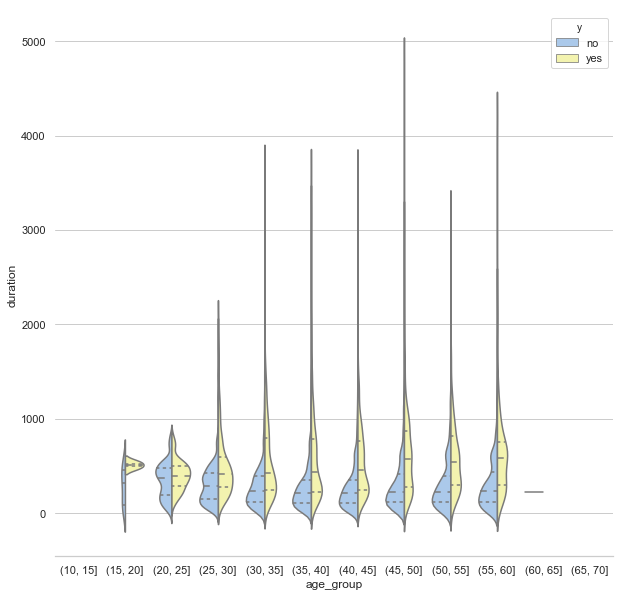

In [13]:
plt.figure(figsize=(10,10))
sns.set(style="whitegrid", palette="pastel", color_codes=True)

tmpdata = data.groupby(by=['duration', 'age', 'y'], as_index=False).agg({'count': pd.Series.count})
tmpdata['age_group'] = pd.cut(data['age'], bins=range(10, 71, 5))
sns.violinplot(x="age_group", y="duration", hue="y",
               split=True, inner="quart",
               palette={"yes": "y", "no": "b"},
               data=tmpdata)
sns.despine(left=True)
plt.savefig('./assets/duration.svg', format='svg')

## Month and day

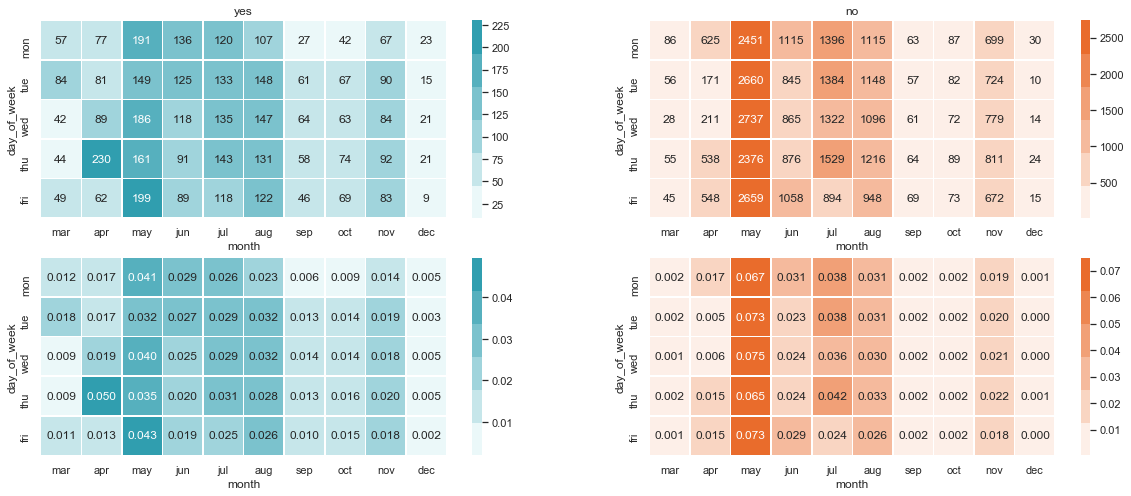

In [20]:
sns.set()
fig = plt.figure(figsize=(20, 8))
# Draw a heatmap with the numeric values in each cell
ax1 = fig.add_subplot(221)
ax1.title.set_text('yes')
sns.heatmap(annot=True, fmt="d", linewidths=.5, ax=ax1, cmap=sns.light_palette((210, 90, 60), input="husl"),
           data=data[data['y']=='yes'].groupby(by=['month', 'day_of_week'], as_index=False).agg({'count': pd.Series.count}) \
            .pivot('day_of_week', 'month', 'count') \
            .reindex(columns=['mar', 'apr', 'may', 'jun', 'jul', 'aug', 'sep', 'oct', 'nov', 'dec'],
                     index=['mon', 'tue', 'wed', 'thu', 'fri']))

ax2 = fig.add_subplot(222)
ax2.title.set_text('no')
sns.heatmap(annot=True, fmt="d", linewidths=.5, ax=ax2, cmap=sns.light_palette((385, 90, 60), input="husl"),
           data=data[data['y']=='no'].groupby(by=['month', 'day_of_week'], as_index=False).agg({'count': pd.Series.count}) \
            .pivot('day_of_week', 'month', 'count') \
            .reindex(columns=['mar', 'apr', 'may', 'jun', 'jul', 'aug', 'sep', 'oct', 'nov', 'dec'],
                     index=['mon', 'tue', 'wed', 'thu', 'fri']))

ax1 = fig.add_subplot(223)
sns.heatmap(annot=True, fmt=".3f", linewidths=.5, ax=ax1, cmap=sns.light_palette((210, 90, 60), input="husl"),
           data=data[data['y']=='yes'].groupby(by=['month', 'day_of_week'], as_index=False).agg({'percentage': pd.Series.sum}) \
            .pivot('day_of_week', 'month', 'percentage') \
            .reindex(columns=['mar', 'apr', 'may', 'jun', 'jul', 'aug', 'sep', 'oct', 'nov', 'dec'],
                     index=['mon', 'tue', 'wed', 'thu', 'fri']))

ax2 = fig.add_subplot(224)
sns.heatmap(annot=True, fmt=".3f", linewidths=.5, ax=ax2, cmap=sns.light_palette((385, 90, 60), input="husl"),
           data=data[data['y']=='no'].groupby(by=['month', 'day_of_week'], as_index=False).agg({'percentage': pd.Series.sum}) \
            .pivot('day_of_week', 'month', 'percentage') \
            .reindex(columns=['mar', 'apr', 'may', 'jun', 'jul', 'aug', 'sep', 'oct', 'nov', 'dec'],
                     index=['mon', 'tue', 'wed', 'thu', 'fri']))
plt.savefig('./assets/month_day.svg', format='svg')

In [15]:
# plt.figure(figsize=(10,10))
# tmpdata=pd.melt(data.groupby(by=['education', 'y'], as_index=False).agg({'count': pd.Series.count}),
#                 "y", var_name="count")
# sns.despine(bottom=True, left=True)
# sns.stripplot(x="education", y="count", hue="y", dodge=True, alpha=.25, zorder=1,
#               data=tmpdata)
# sns.pointplot(x="education", y="count", hue="y", dodge=.532, join=False, palette="dark", markers="d", scale=.75, ci=None,
#               data=tmpdata)

# sns.set(style="whitegrid")
# f, ax = plt.subplots(figsize=(10, 10))
# crashes = data.groupby(by=['education', 'y'], as_index=False).agg({'count': pd.Series.count}).sort_values("count", ascending=False)
# crashes['count_yes'] = .groupby(df.domain.str.strip("'"))['ID'].nunique()

# sns.set_color_codes("pastel")
# sns.barplot(x="education", y="count", data=crashes,
#             label="Total", color="b")

# sns.set_color_codes("muted")
# sns.barplot(x="y", y="count", data=crashes,
#             label="Alcohol-involved", color="b")

# ax.legend(ncol=2, loc="lower right", frameon=True)
# ax.set(xlim=(0, 24), ylabel="",
#        xlabel="Automobile collisions per billion miles")
# sns.despine(left=True, bottom=True)